# 付録 B: Plotnine と Pysocviz についてその他いろいろ

注: このセクションは原著には含まれていません. Python ユーザに対する補足事項です.

In [1]:
from plotnine import *
from pysocviz.p9extra import scale_color_pander, scale_color_colorblind, scale_color_OkabeIto, scale_fill_OkabeIto
from mizani.formatters import percent_format
from pysocviz.loader import load_dataset
from gapminder import gapminder

## デフォルトフォントの変更

`theme()` および `theme` という接頭語で始まるいくつかの関数 (例 `theme_gray`, `theme_minimal`) はデフォルトのフォントファミリを簡単に変更できます. 以下の例ではグラフ全体のフォントファミリを "DejaVu Serif" に変更しています.

もちろん, あなたのシステムにインストールされているフォントのみを使うことができます. もしあなたのシステムにこのフォントがなければ, 他の名前に書き換える必要があります (例 "Times", "Arial" とか)

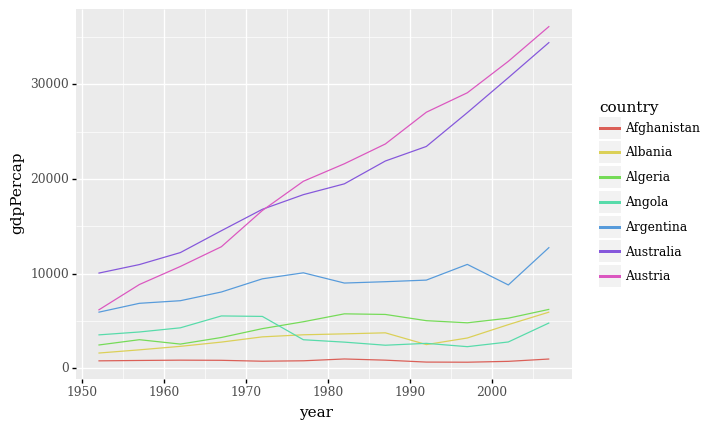

<ggplot: (8778547700221)>

In [2]:
p = ggplot(
    gapminder.loc[lambda d: d['country'].isin(gapminder['country'].unique()[:7])],
    aes(x='year', y='gdpPercap', color='country', group='country')) + geom_line()

p + theme(text=element_text(family='DejaVu Serif'))

これらのテーマ関数のいくつかは `base_family` 引数があります. これにはフォントファミリの名称を指定できます.

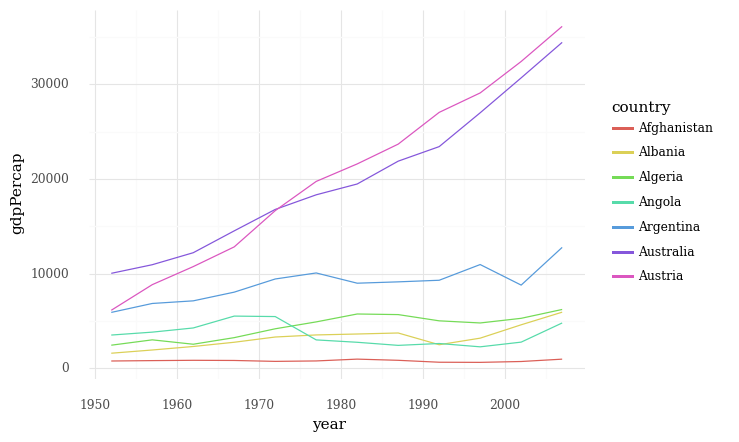

<ggplot: (8778547706344)>

In [3]:
p + theme_minimal(base_family='DejaVu Serif')

`theme_set()` 関数でデフォルトのフォントファミリ (あるいは他のテーマ項目) を設定することもできます. この設定は Python セッション終了まで有効です.

In [4]:
theme_set(theme_minimal())

'DejaVu' フォントシリーズは多くのグリフをサポートしていますが, CJK (中国語・日本語・韓国語) のグリフはサポートしていません. あなたがこれらの言語をお使いなら (この文章を見ているならおそらく日本語ユーザでしょう) 必要なフォントはシステムに依存します. 例えば, 以下の表に, 主要な3種類のOSで標準の日本語フォントとしてインストールされているものを挙げます.

| OS         |名前 (ゴシック体タイプ)  |
|:-----------|:-----------------|
|Windows 10  |`Yu Gothic`       |
|Mac OS      |`Hiragino Sans`   |
|Ubuntu 20.40|`Noto Sans CJK JP`|


なお, **matplotlib** も **plotnine** のほとんどのテーマ関数も DejaVu など欧文用フォントがデフォルト値なので, 文字化けを防ぐには忘れずに指定する必要があります.

# 色スケール関数について

## ggplot2 との比較

**plotnine** では `scale_color_brewer()` 関数は **ggplot2** でのオリジナルのものより多くの種類のカラーマッピングを使用できます. リストは[ここ](https://matplotlib.org/stable/tutorials/colors/colormaps.html) を確認してください. `scale_color_cmap()` と `scale_color_cmap_d()` もまた同じカラーマッピング名の指定ができます. 前者は連続スケール専用で, 後者は離散/質的スケール専用です.

**plotnine** は他にも `scale_color_distiller` や`scale_color_gradientn` のような関数をサポートしてます.

## カテゴリカル/質的なカラーマッピングについて

R パッケージの **ggthemes** と **colorblindr** からいくつかの関数を借用しました. これらはカラーユニバーサルデザインに基づいたものです.

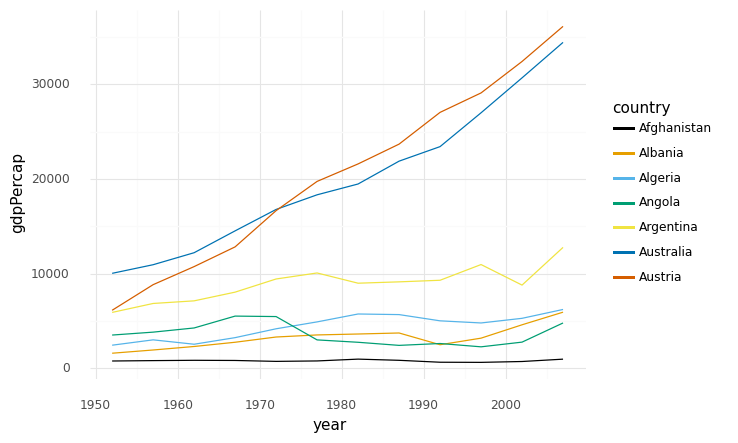

<ggplot: (8778547705688)>

In [5]:
p = ggplot(
    gapminder.loc[lambda d: d['country'].isin(gapminder['country'].unique()[:7])],
    aes(x='year', y='gdpPercap', color='country', group='country')) + geom_line()
p + scale_color_colorblind()

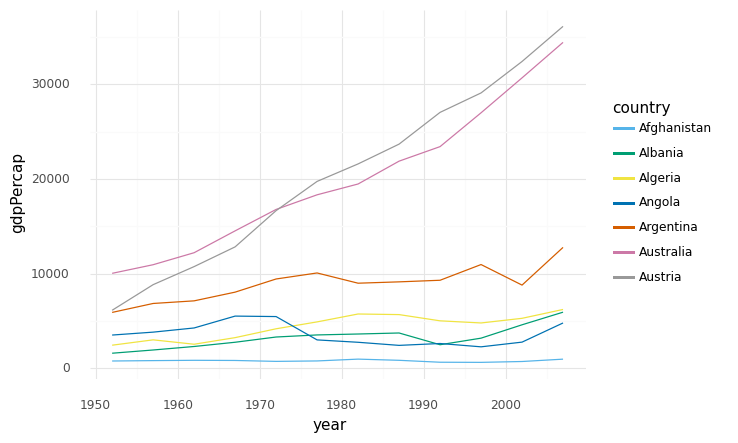

<ggplot: (8778538233227)>

In [6]:
p = ggplot(
    gapminder.loc[lambda d: d['country'].isin(gapminder['country'].unique()[:7])],
    aes(x='year', y='gdpPercap', color='country', group='country')) + geom_line()
p + scale_color_pander()

現時点では私の手抜きにより, これらの関数は8要素までしか使えません. よって8要素を超えてプロットしようとするとエラーが発生します. しかし `scale_*_OkabeIto` は色の並び順や繰り返しについてカスタマイズできます.

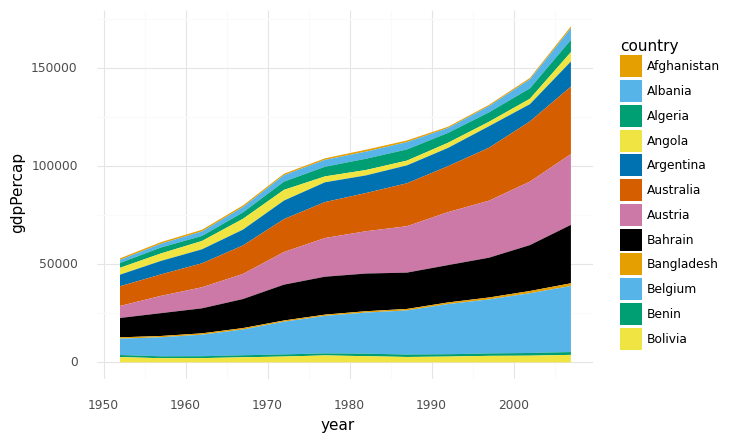

<ggplot: (8778533570666)>

In [7]:
p = ggplot(
    gapminder.loc[lambda d: d['country'].isin(gapminder['country'].unique()[:12])],
    aes(x='year', y='gdpPercap', fill='country', group='country')) + geom_area()
p + scale_fill_OkabeIto(order=list(range(8)) + list(range(4)))

## (WIP) パレート図と第2のY軸について


現在, **plotnine** は複数軸をサポートしていません (参考: https://github.com/has2k1/plotnine/issues/68).

よってパレート図のようなものを定義通り厳密に描くことは困難です.

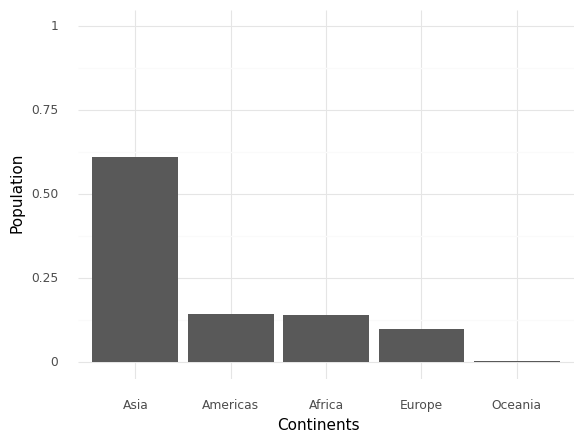

In [8]:
tmp = gapminder.loc[lambda d :d['year']==2002].groupby(
    'continent'
).sum().reset_index()
tmp['rate'] = tmp['pop']/tmp['pop'].sum()

p1 = ggplot(
    tmp,
    aes(x='reorder(continent, -pop)', y='rate')
) + geom_bar(stat='identity'
) + labs(x='Continents', y='Population'
) + coord_cartesian(ylim=[0, 1])
p1.draw();

In [9]:
tmp = tmp.sort_values('rate', ascending=False, ignore_index=True).assign(
    cumrate=lambda d: d['rate'].cumsum()
)

通常は, 棒グラフと折れ線グラフのスケールを変えますが, 以下のプロットでは変えられていません. 値のスケールを変えることは可能ですが, 複数のY軸目盛りを同時に表示することはできません.

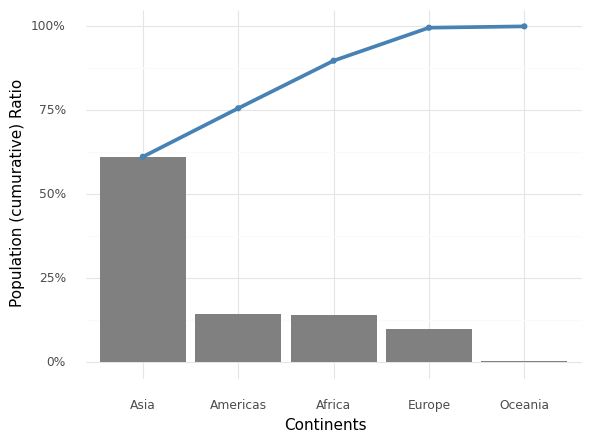

<ggplot: (8778530923418)>

In [10]:
p2 = ggplot(
    tmp, aes(x='reorder(continent, -pop)', y='cumrate')
) + geom_bar(aes(y='rate'), stat='identity', fill='gray'
) + geom_path(aes(group=1), color='steelblue', size=1.5
) + geom_point(color='steelblue', size=1.5
) + scale_y_continuous(labels=percent_format()
) + labs(x='Continents', y='Population (cumurative) Ratio')
p2